<a href="https://colab.research.google.com/github/VihaanS22/API-/blob/main/Matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

media = files.upload()


Saving note_auth.csv to note_auth.csv


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("note_auth.csv")

print(df.head())

   variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0


In [ ]:
factors = df[["variance",  "skewness",  "curtosis",  "entropy"]]
target = df["class"]

In [ ]:
from sklearn.model_selection import train_test_split as tt

factors_train, factors_test, target_train, target_test = tt(factors, target, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

factors_train = sc.fit_transform(factors_train)
factors_test = sc.transform(factors_test)

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(factors_train, target_train)


LogisticRegression(random_state=0)

In [ ]:
target_prediction = classifier.predict(factors_test)

predicted_values = []

for i in target_prediction:

  if i == 0:
    predicted_values.append("Forged")

  else:
    predicted_values.append("Authorized")

actual_values = []

for j in target_test.ravel():

  if j == 0:
    actual_values.append("Forged")

  else:
    actual_values.append("Authorized")


[Text(0, 0.5, 'Forged'), Text(0, 1.5, 'Authorized')]

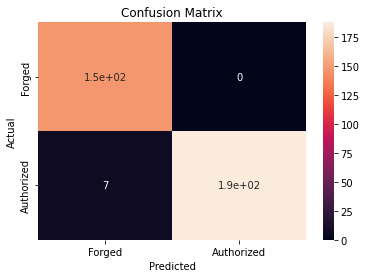

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

labels = ["Forged", "Authorized"]
cm = confusion_matrix(actual_values, predicted_values)

ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)

ax.set_title("Confusion Matrix")
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
accuracy = ((1.5e+02)+(1.9e+02))/((1.5e+02)+(1.9e+02)+7+0)
print(accuracy)

0.9798270893371758
